<p>
    <span><img src="coverPhoto.png" alt="" style="width: 100%; height: auto; border-radius: 3px;"></span>
</p>

# 🚢 Titanic Survival Classification Project

This project predicts the **survival of passengers on the Titanic** using Gradient Boosting machine learning model. It is implemented in Python within a Jupyter Notebook environment.

## 📘 Project Overview

The objective of this notebook is to **analyze the Titanic dataset** and **build a predictive model** that classifies whether a passenger survived or not based on features such as age, gender, class, and other attributes.

## ⚙️ Steps

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import pickle

### 1. Data Loading
The dataset is loaded from a CSV file which is obtained from [Kaggle's Titanic dataset](http://kaggle.com/competitions/titanic/data?select=train.csv).

In [2]:
df=pd.read_csv('train.csv')

In [3]:
# Display the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Data Analysis

Analyze the dataset and perform exploratory data analysis.

In [4]:
# Display the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Display the summary of dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 891 rows and 12 columns


In [7]:
print(f"Missing values in the dataset are {df.isna().sum().sum()}.")

Missing values in the dataset are 866.


In [8]:
print("Missing values in each column")
print(df.isna().sum())
print("Total rows in dataset are", df.shape[0])

Missing values in each column
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Total rows in dataset are 891


### 3. Data Preprocessing
#### Handling missing values for`Cabin`, `Age` and `Embarked` column.

In [9]:
# Drop the Cabin column as it contains too many missing values
df=df.drop('Cabin',axis=1)

In [10]:
# Impute the missing values of Age column with median of Age Column
df['Age']=df[['Age']].fillna(df['Age'].median())

In [11]:
# Impute the missing values of Embarked column of data with mode of Embarked Column
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
print(f"Missing values in the dataset are {df.isna().sum().sum()}.")

Missing values in the dataset are 0.


#### Drop Unneccesary columns such as `PassengerId`, `Name`, `Ticket` to remove noise from data.

In [13]:
# remove unneccessary columns from dataset
df=df.drop(['PassengerId','Name','Ticket'],axis=1)

In [14]:
print("Remaining Columns are",list(df.columns))

Remaining Columns are ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


#### Display Unique values of each categorical and discrete column

In [15]:
print("Unique values of Each column: ")
for col in df.select_dtypes(include=['object','category','int']).columns:
    print(f"{col}: {df[col].unique()}")

Unique values of Each column: 
Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Embarked: ['S' 'C' 'Q']


#### Display range of continuous columns

In [16]:
print("Range of Age Column")
print(f"Min: {df['Age'].min()}, Max: {df['Age'].max()}")

Range of Age Column
Min: 0.42, Max: 80.0


In [17]:
print("Range of Fare Column")
print(f"Min: {df['Fare'].min()}, Max: {df['Fare'].max()}")

Range of Fare Column
Min: 0.0, Max: 512.3292


#### Encoding Categorical Columns such as `Sex` and `Embarked`.

In [18]:
# Encode the Sex and Embarked Columns
sexEncoder=LabelEncoder()
df['Sex']=sexEncoder.fit_transform(df['Sex'])

embarkedEncoder=LabelEncoder()
df['Embarked']=embarkedEncoder.fit_transform(df['Embarked'])

#### Splitting data into **training** and **testing** sets.

In [19]:
# Split the Data in training and testing data
X=df.drop('Survived',axis=1)
y=df['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

### 4. Exploratory Data Analysis (EDA)

#### Visualization of survival distribution.

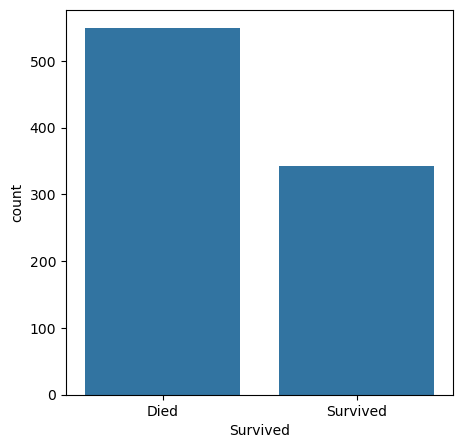

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Survived'])
plt.xticks([0, 1], ['Died', 'Survived'])
plt.show()

#### Correlation Heatmap

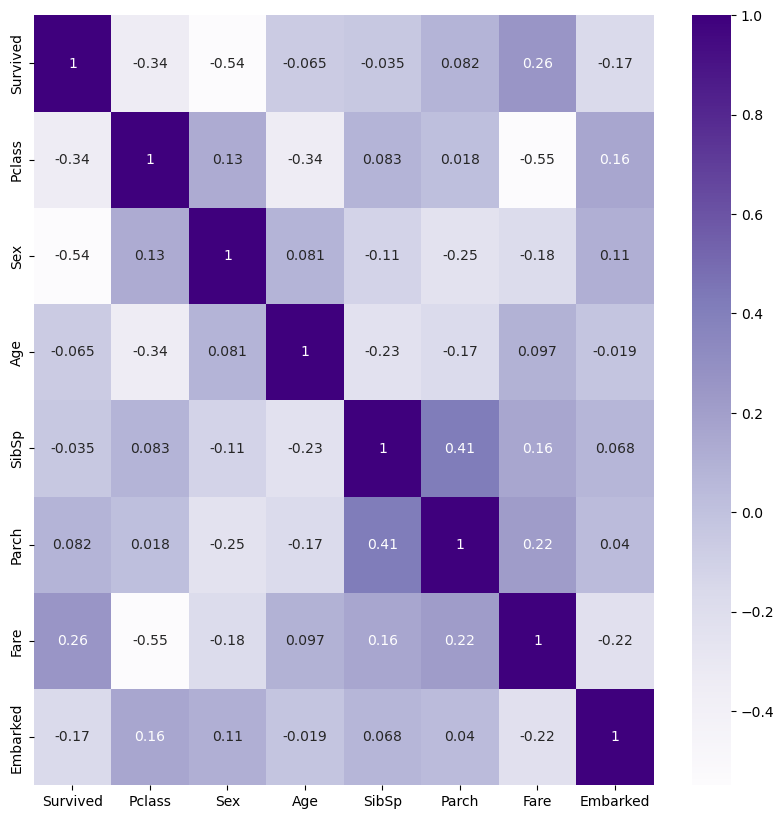

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Purples')
plt.show()

#### Scatter Plot of Age vs Fare

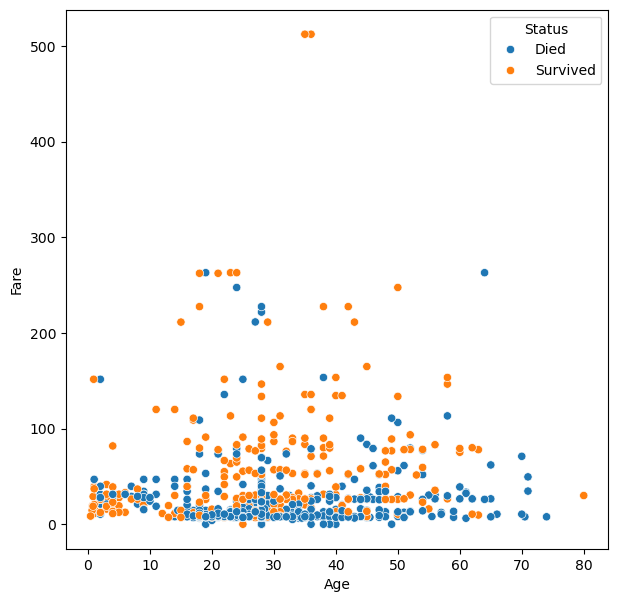

In [22]:
plt.figure(figsize=(7,7))
ax=sns.scatterplot(x='Age',y='Fare',data=df,hue='Survived')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Died', 'Survived'], title='Status')
plt.show()

#### Analysis of survival rate by Sex

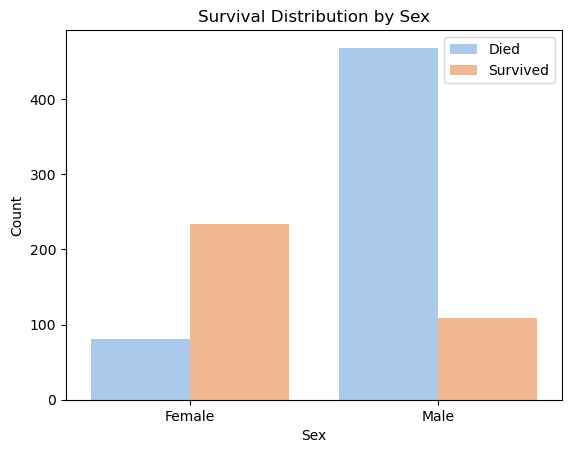

In [23]:
sns.countplot(x='Sex', hue='Survived', data=df, palette='pastel')
plt.title('Survival Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(['Died', 'Survived'])
plt.show()

#### Analysis of survival rate by Class

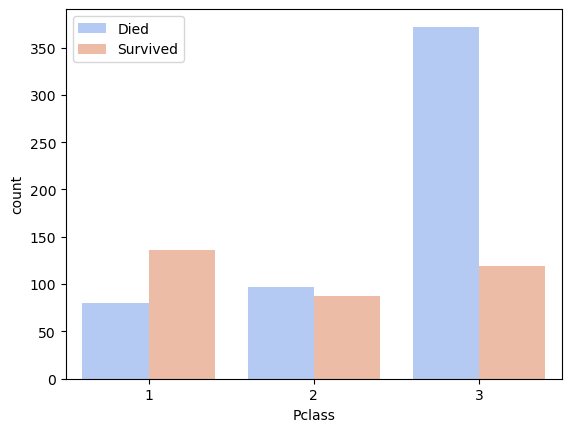

In [24]:
sns.countplot(df,x='Pclass', hue='Survived', palette='coolwarm')
plt.legend(['Died', 'Survived'])

#### Analysis of Survival rates by Embarked

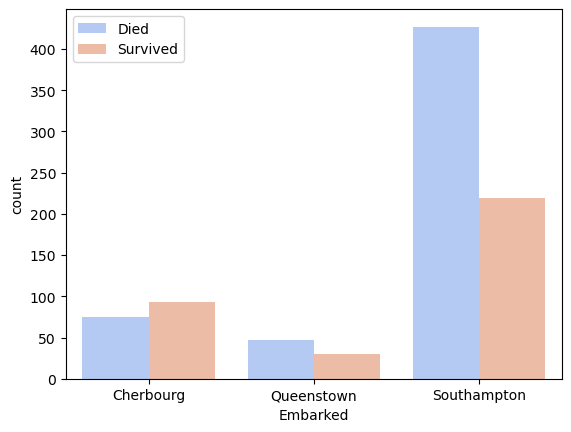

In [25]:
sns.countplot(df,x='Embarked', hue='Survived', palette='coolwarm')
plt.xticks(['0', '1', '2'], ['Cherbourg', 'Queenstown', 'Southampton'])
plt.legend(['Died', 'Survived'])

#### Analysis of Survival rates by SibSp

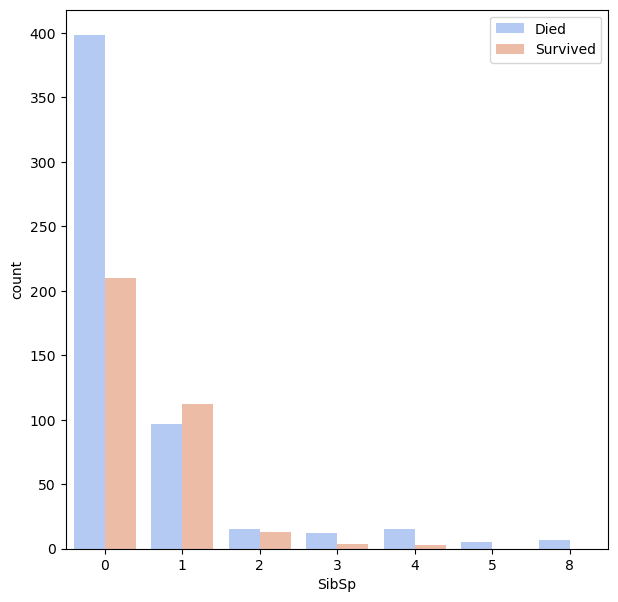

In [26]:
plt.figure(figsize=(7,7))
sns.countplot(df,x='SibSp', hue='Survived', palette='coolwarm')
plt.legend(['Died', 'Survived'])
plt.show()

#### Analysis of Survival rates by Parch

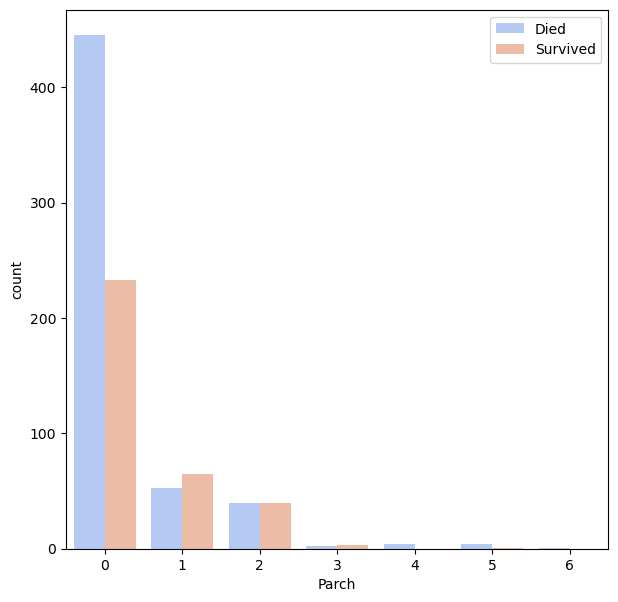

In [27]:
plt.figure(figsize=(7,7))
sns.countplot(df,x='Parch', hue='Survived', palette='coolwarm')
plt.legend(['Died', 'Survived'])
plt.show()

### 5. Model Building, Training, and Evaluation
The GradientBoostingClassifier machine learning algorithms is tested (based on code analysis). Model training is done using **`scikit-learn`**, with evaluation via metrics like **accuracy score**, **confusion matrix**, and **classification report**. The model’s performance is evaluated using accuracy, precision, recall, and F1-score. Visualizations such as confusion matrices and feature importance plots are also included.

#### Model Building and Training 

In [28]:
# Traning the model
model=GradientBoostingClassifier()
model.fit(X,y)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


#### Evaluation

In [29]:
# Evaluating the model
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(f"The accuracy of the model is: {100*accuracy:.2f}%")

The accuracy of the model is: 87.71%


In [30]:
print("Classification Report\n",classification_report(y_test,y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       105
           1       0.87      0.82      0.85        74

    accuracy                           0.88       179
   macro avg       0.88      0.87      0.87       179
weighted avg       0.88      0.88      0.88       179



Confusion Matrix


<Axes: >

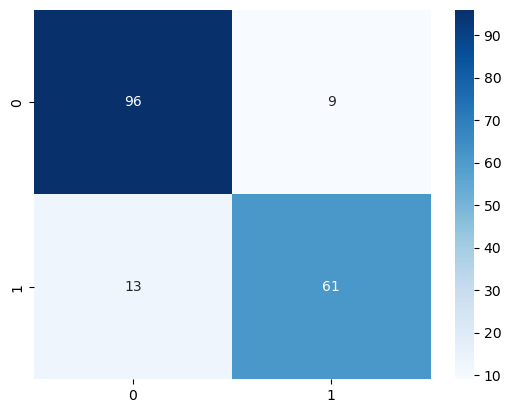

In [31]:
print("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')

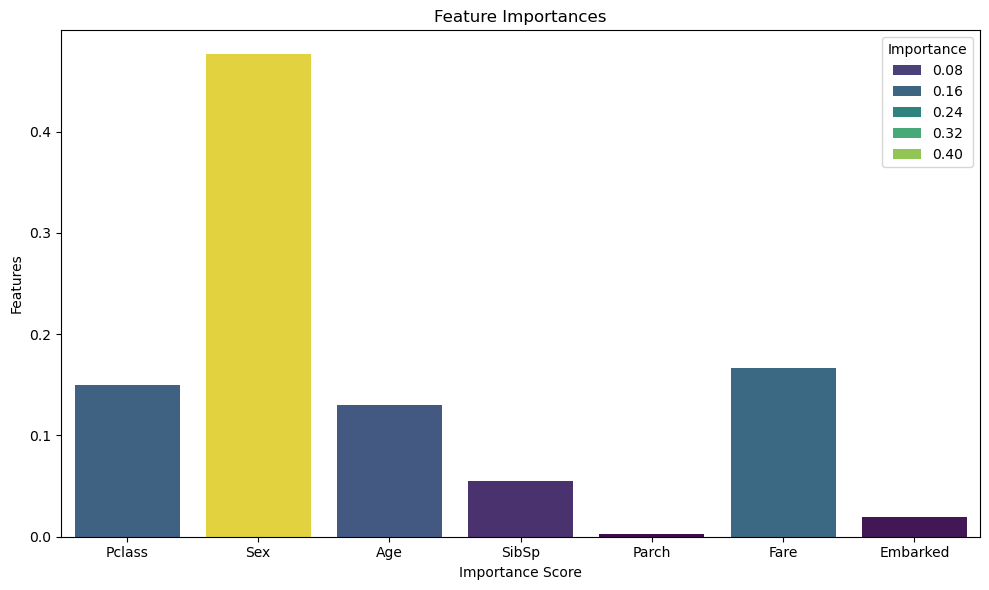

In [32]:
# Plot the importances of features
importances_df=pd.DataFrame({
    'Feature':X.columns,
    'Importance':model.feature_importances_
})

plt.figure(figsize=(10,6))
sns.barplot(data=importances_df, x='Feature', y='Importance', palette='viridis',hue='Importance')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

### 6. Saving the Model

In [33]:
pickle.dump(model,open('model.pkl','wb'))

### 7. Prediction

In [34]:
# Take user input and predict survival

pclass=int(input("Enter class: [1, 2, 3]"))
sex=input("Enter sex: ['male', 'female']")
age=int(input("Enter age: "))
sibsp=int(input("Enter SibSp: "))
parch=int(input("Enter Parch: "))
fare=float(input("Enter fare: "))
embarked=input("Enter Embarkation Port: ['S' 'C' 'Q']")

sex=sexEncoder.transform([sex])
embarked=embarkedEncoder.transform([embarked])

testData=pd.DataFrame({'Pclass':[pclass],'Sex':[sex],'Age':[age],'SibSp':[sibsp],'Parch':[parch],'Fare':[fare],'Embarked':[embarked]})

testPred=model.predict(testData)
if testPred==0:
    print("Passenger did'nt Survived")
else:
    print("Passenger Survived")

Passenger Survived


## Conclusion
The model achieves **87.71%** accuracy in predicting passenger survival in my environment and system. The analysis highlights that `sex`, `age`, `fare` and `pclass` are the most significant predictors and `Embarked`, `Parch` and `SibSp` are least significant predictors of passenger survival.